* Notebook by Adam Lang
* Date: 2/3/2025

# Overview
* This notebook is based on the concepts taught in Daniel Bourke's PyTorch for Deep Learning Bootcamp on Udemy.
* Although I have been coding in PyTorch since 2022, I continually review and brush up on my torch skills and Daniel Bourke is the best in the business at teaching tips and tricks to make you a PyTorch guru.

* As the great Kobe Bryant once said:
```
Mamba Mentality means "to constantly try to be the best version of yourself. It's a constant quest to try to better today than you were yesterday."
```
```
“Why do you think I’m the best player in the world? Because I never ever get bored with the basics.”
```

# PyTorch Workflow
* Exploring and experimenting with an example PyTorch end-to-end Workflow.
* This is the entire workflow of most pytorch projects and experiments (image credit: Daniel Bourke, udemy)

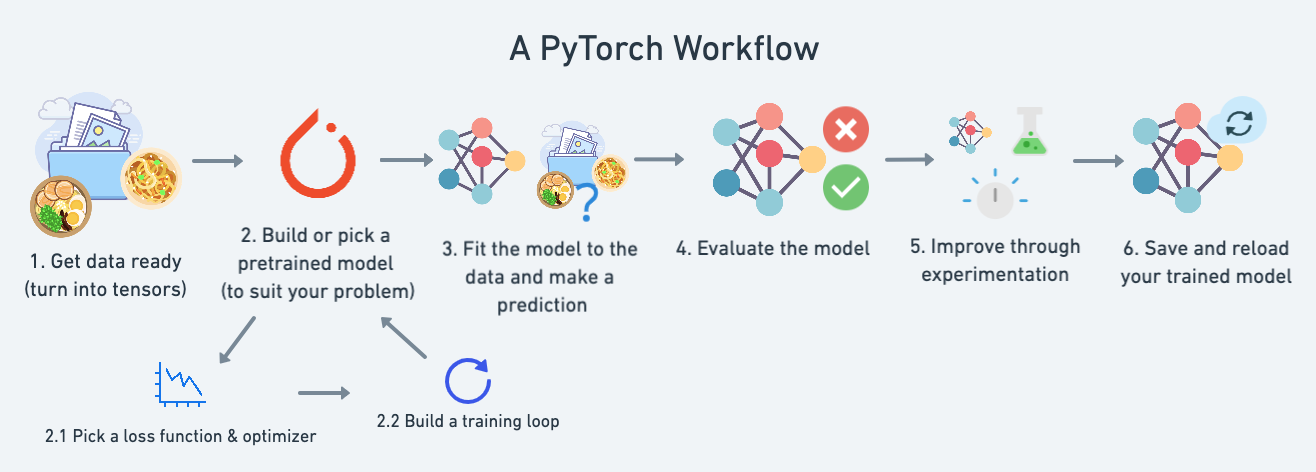

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting model to data (training)",
                      4: "making predictions and evaluating",
                      5: "saving and loading a model",
                      6: "putting it all together"}


what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting model to data (training)',
 4: 'making predictions and evaluating',
 5: 'saving and loading a model',
 6: 'putting it all together'}

# Import Dependencies

In [2]:
import torch
from torch import nn ## neural networks in torch
import matplotlib.pyplot as plt
%matplotlib inline

## checking pytorch version
print("PyTorch version: {torch.__version__}")

PyTorch version: {torch.__version__}


# 1. Data Preparation and Loading
* This is always step 1 in PyTorch workflows.
* As we know, data can be anything in machine learning:
1. Excel spreadsheets, csv, tsv, etc.
2. Videos (e.g. YouTube)
3. Audio (e.g. podcasts, music)
4. Text
5. DNA
6. Multimodal -- all of this together!


Machine Learning workflows still apply here
1. Get data into numerical representation.
2. Build a model to learn patterns in the numerical representation.


To showcase this we will
* Use linear regression formula to make a straight line with *known* **parameters**.
  * Parameters is something that a model learned.

In [3]:
## experiment with X with squeeze dims

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X2 = torch.arange(start, end, step)
y = weight * X2 + bias

print(X2.ndim)
print(y.ndim)

1
1


In [4]:
## squeeze X again
#X2 = X # copy
X2.shape, X2.ndim

(torch.Size([50]), 1)

Summary
* This is a tensor with dimension of 1, shape of 1. We have to unsqueeze it in order to work with 2 tensors together.
* A tensor with a shape of 1 is often considered difficult to work with because it essentially represents a **single value**, making it hard to perform meaningful operations that require multiple elements along a dimension, which is the primary purpose of tensors in most machine learning applications.
  * essentially, it lacks the "vector-like" behavior expected when dealing with tensors in calculations involving matrices or higher-dimensional data.
* This is why we need to "unsqueeze the tensor" so we can expand its dimensions for matrix operations.


In [5]:
## unsqueezing it from 1 dimension
X2 = X2.unsqueeze(dim=1)
X2.shape, X2.ndim

(torch.Size([50, 1]), 2)

In [6]:
## if we were to squeeze it again
X2 = X2.squeeze(dim=1)
X2.shape, X2.ndim

(torch.Size([50]), 1)

## Setting up linear regression parameters

In [7]:
## known params
## y = ax + b --> linear regression formula
## y = (weight*X) + bias
weight = 0.7
bias = 0.3

# create variables
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) ## add extra dim
y = weight * X + bias

## view first 10 of X and 10 of y
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [8]:
## len X, len y
len(X), len(y)

(50, 50)

In [9]:
## dims
X.ndim, y.ndim

(2, 2)

## Splitting data into training and test sets
* Most important concept in machine learning that we all know unless we are doing "zero-shot" learning.

### 3 datasets
1. **training set**
  * 60-80% of dataset
  * Always used
2. **validation set**
  * Tune model parameters
  * ~10-20% of dataset
  * Often used but NOT ALWAYS.
3. **test set**
  * See if your model is "ready for the wild"
  * how does your model generalize on "unseen data".
  * Always used!!

In [10]:
## Create train/test split
train_split = int(0.8 * len(X))
train_split

40

In [11]:
## setup the train_test split
X_train, y_train = X[:train_split], y[:train_split] ## :inwards
X_test, y_test = X[train_split:], y[train_split:] ## outwards:

## len of all
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Data Visualization/Exploratory Analysis
* Exploratory Data visualization.
* We will write a function to plot the train and test data.

In [12]:
## function to plot data
def plot_preds(train_data=X_train,
               train_labels=y_train,
               test_data=X_test,
               test_labels=y_test,
               predictions=None):
  """
  Plots training data, test data, and compares predictions.

  """
  plt.figure(figsize=(12,8))


  ## plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")


  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  ## are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend and labels
  plt.legend(prop={"size": 14},loc="upper left");
  plt.xlabel("X variable")
  plt.ylabel("y variable")
  plt.show();

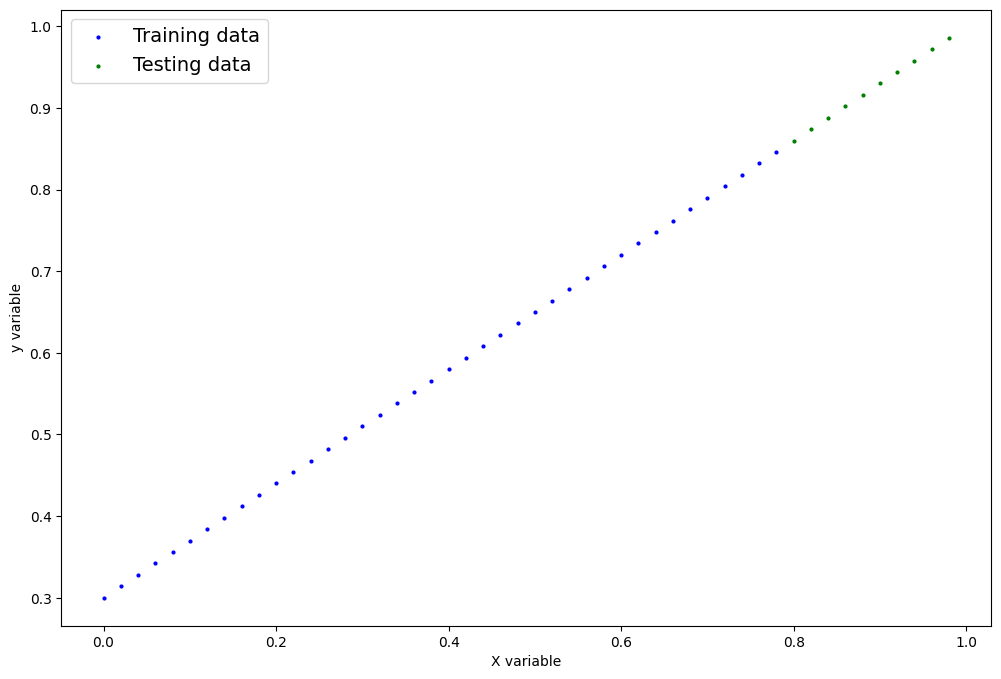

In [13]:
## plot with function
plot_preds();

# 2. Build Model in PyTorch
* `nn.Module` is the "lego building blocks" of PyTorch.
  * This means that you can "stack" neural networks on top of each other like lego blocks.
* Baseclass for ALL neural network models.
* Docs: https://pytorch.org/docs/stable/generated/torch.nn.Module.html


What the model does
1. Start with random values (weight & bias)
2. Look at training data and adjust random values to better represent (get closer to) ideal values (weight & bias values we used to create data).

How does it do this? Through 2 main alogrithms
1. Gradient Descent
2. Backpropagation


PyTorch will update the weights and biases using gradient descent and backpropagation as the model performs its computations.
* This is an excellent demo of what these algorithms are and how they work: https://xnought.github.io/backprop-explainer/

### `Torch.AutoGrad`
* PyTorch uses `requires_grade=True` "under the hood" by default to set `torch.autograd`.
* What this means is that it automatically calculates the gradients for you.

In [14]:
import torch
from torch import nn ## neural network module

## create linear regression model class
class LinearRegressionModel(nn.Module): # <- building block of PyTorch
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, #<-- start with random weights and adjust to ideal weights
                                            requires_grad=True, ## update weights w/ gradient descent
                                            dtype=torch.float)) ## float32 is default dtype
    self.bias = nn.Parameter(torch.randn(1, #<-- start with random weights and adjust to ideal weights
                                         requires_grad=True, ## update weights w/ gradient descent
                                         dtype=torch.float)) ## float32 default dtype

  ## forward method of neural network computations
  ## in our case this is the Linear Regression algorithm
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input/train data, returns torch.Tensor
    return self.weights * x + self.bias # linear regression formula: y = ax + b

## PyTorch model building essentials
1. `torch.nn` --> contains all of the build blocks for computation graphs
  * NN are a form of computational graphs.
2. `torch.nn.Parameter` - what parameters the model should try and learn.
  * Often a PyTorch layer from `torch.nn` will set these for us.
3. `torch.nn.Module` - the base class for all neural network modules!
  * If you subclass it, you should overwrite the FORWARD method as we did above.
4. `torch.optim` - this is where the optimizers in PyTorch live.
  * They will help with gradient descent.
5. `def forward()` - all `nn.Module` subclasses require you to overwrite Forward method.
  * This method defines what happens in the forward pass through the neural network.
6. `torch.utils.Dataset`
  * represents a map between key (label) and sample (features) pairs of your data such as images and their associated labels.
  * This is similar to Hugging Face datasets which are dictionaries.
7. `torch.utils.DataLoader`
  * Creates a Python iterable over a torch Dataset.
  * Allows you to iterate over your data!

### Checking the contents of our PyTorch Model
* Now that we have a model, lets see whats inside.
* We can check out our model parameters or whats inside our model using `.parameters()`.

In [15]:
## test
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

In [16]:
# create a random seed for consistency/reproducibility
torch.manual_seed(42)

# create instance of model we created -- subclass of nn.Module
model_0 = LinearRegressionModel()

# check out model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
# List named parameters in the `state_dict()`
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
## just a reminder of the weight and bias values
weight, bias

(0.7, 0.3)

### Making Predictions using `torch.inference_mode()`
* To check our models predictive power, lets see how well it predicts `y_test` based on `X_test`.

* When we pass data through our model, its going to run it through the `forward()` method.

In [19]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

Summary
* Ideal model takes in X_test and predicts y_test

In [20]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

Summary
* Notice above if we do this the "classical" way there are gradients listed.
* Below if we use inference mode it TURNS OFF GRADIENT TRACKING -- removes all gradient updates when making predictions.
  * This means PyTorch has to store less data!

In [21]:
## Make predictions with model
## torch.inference is the SAME as predictions
with torch.inference_mode():
  y_preds = model_0(X_test) ## predict on the test set!

y_preds

## you can also do someting similar with torch.no_grad(), however inference mode is perfered
# with torch.no_grad():
#   y_preds = model_0(X_test)

# y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

#### `torch.inference_mode()`
* See more on inference mode here:
https://x.com/PyTorch/status/1437838231505096708
* Use `torch.inference_mode()` to prevent gradients from being computed/stored during inference, allowing PyTorch to skip some tensor book-keeping and checks.
* This largely replaces `torch.no_grad()` as the way to tell PyTorch that the execution will not require gradient backprop.
* Only consider `torch.no_grad()` if `torch.inference_mode()` doesn’t work.
  * If you want the performance benefits of `torch.inference_mode()` for a section of code but need to use the tensor results in grad mode later, `torch.no_grad()` might be for you.
  * See Autograd mechanics for more detail.
  * Source: https://paulbridger.com/posts/pytorch-tuning-tips/



In [22]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

### Plot Predictions

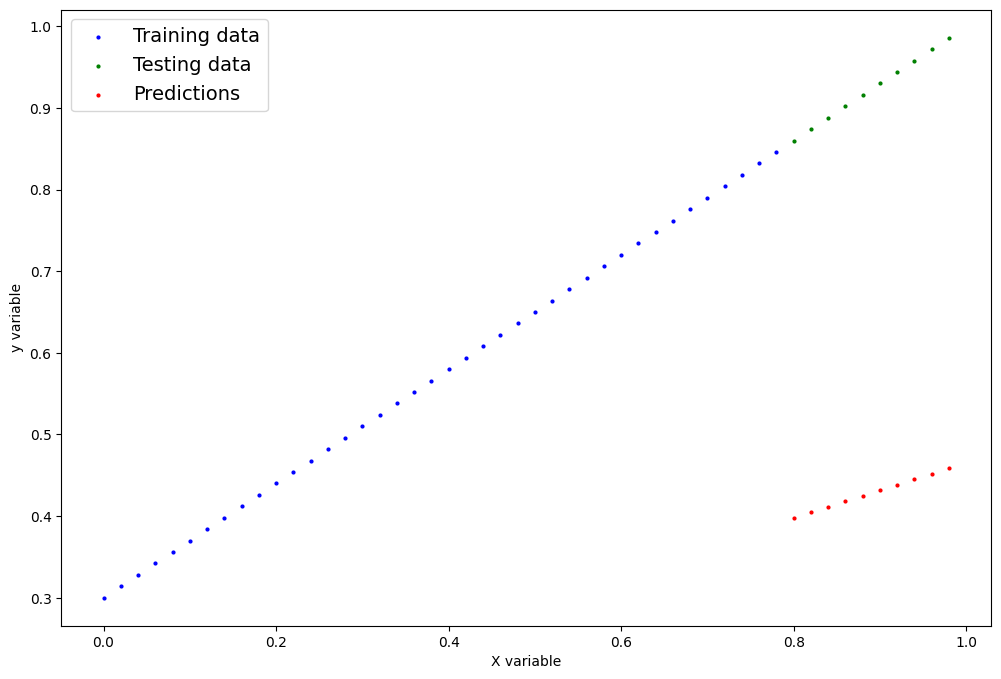

In [23]:
plot_preds(predictions=y_preds)

Summary
* Model was initialized with random parameters using `torch.randn()` so it is making random predictions as we see above.

# 3. Train Model
* The big idea of training a model is to move from unknown parameters (these may be random) to known parameters.
* Or in other words from a poor representation of the data to a better representation of the data.


* **One way to measure how poor or how wrong the model's predictions are is to use a loss function.**
  * Loss functions may also be called:
    * Cost Functions
    * Criterion
    * Loss functions in torch: https://pytorch.org/docs/stable/nn.html#loss-functions
  * Great blog post on pytorch loss functions: https://neptune.ai/blog/pytorch-loss-functions


Things we need to train:

1. **Loss Functions**
  * A function to measure how wrong your models predictions are to ideal outputs.
  * **lower is better**


2. **Optimizer**
  * Takes into account loss of a model and **adjusts the models parameters** (e.g. weight & bias) to **improve the loss function.**
  * `torch.optim`: https://pytorch.org/docs/stable/optim.html
  * Examples:
    * `SGD` - stochastic gradient descent
      * Stochastic Gradient Descent (SGD) is like a smart shortcut for machine learning algorithms to find the best settings quickly.
      * Instead of checking every possible option, it **randomly samples a few and uses them to improve step by step.**
      * SGD is an iterative optimization algorithm widely used in machine learning and deep learning applications to find the model parameters that correspond to the best fit between predicted and actual outputs.
      * SGD is a variant of the gradient descent algorithm, but instead of performing computations on the entire dataset, SGD calculates the gradient using just a random small part of the observations, or a "mini-batch".
  * Inside the optimizer you often see 2 parameters:
    * `params` - model parameters you'd like to optimize for example, `params=model_0.parameters()`
    * `lr`(learning rate) - learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step
      * a small lr --> small changes
      * a large lr --> BIG CHANGES

And specifically for PyTorch, we need:
  * Training Loop
  * Testing Loop

In [24]:
## model 0 params
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [25]:
# state dict -> check out our model's parameters
## parameter is a value the model sets itself
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Setup a Loss Function and Optimizer
* `L1 loss `
  * Creates a criterion that measures the mean absolute error (MAE) between each element in the input
* `MSELoss`
  * L2 norm or mean squared error (MSE)


Note:
* Model sets the parameters
* We as data scientists set the hyperparameters
* The learning rate (lr) tells the model how fast to make these changes.
  * Smaller lr = slower/smaller changes
  * Larger lr = faster/bigger changes

In [26]:
## Setup loss function --> measures how wrong our model is (preds vs. actual)
loss_fn = nn.L1Loss()

## setup an optimizer (SGD - stochastic gradient descent) --> adjusts based on loss function
## smaller lr --> smaller changes in params (e.g. 0.001)
## larger lr --> larger changes in params (e.g. 0.1)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate --> possibly most important hyperparameter

### Which loss function and optimizer should I use?
* This depends on your data, model and use case(s). It also depends on personal experience.
* As an example, a **simple regression problem** like that above:
  * The loss function we used was `nn.L1Loss()`
  * The optimizer we used was `torch.optim.SGD()`.
  * Both are acceptable for a regression model.
* However, for **Classification Problems**
  * If it is a binary classification problem you would use `nn.BCELoss()` or binary cross entropy loss.
  * If it were multi-class classification problem you would use `nn.CrossEntropyLoss()`.

## Building a Training Loop and Testing Loop in PyTorch
* What we need for a **training loop**:
0. **Loop through the data**
1. **Forward pass**
  * This involves data moving through our model's `forward()` functions to generate predictions on data.
  * Data moving from input to output layers of neural network -- forward propagation.
2. **Calculate the loss**
  * Compare forward pass predictions to ground truth labels.
3. **Optimizer Zero grad**
  * Zeros out the gradients after the forward pass.
  * This is all the calculations (e.g. weights and biases) from the forward pass to start with a "clean slate".
4. **Loss backward**
  * *backward propagation* (pass) through the neural network.
  * This calculates the gradients of each of the parameters of our model with respect to the loss.
5. **Optimizer step**
  * *gradient descent*
  * Use the optimizer to adjust our model's parameters to try and improve the loss.

In [27]:
with torch.no_grad():
  print(list(model_0.parameters()))

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


This is an image from Daniel Bourke of the training loop:
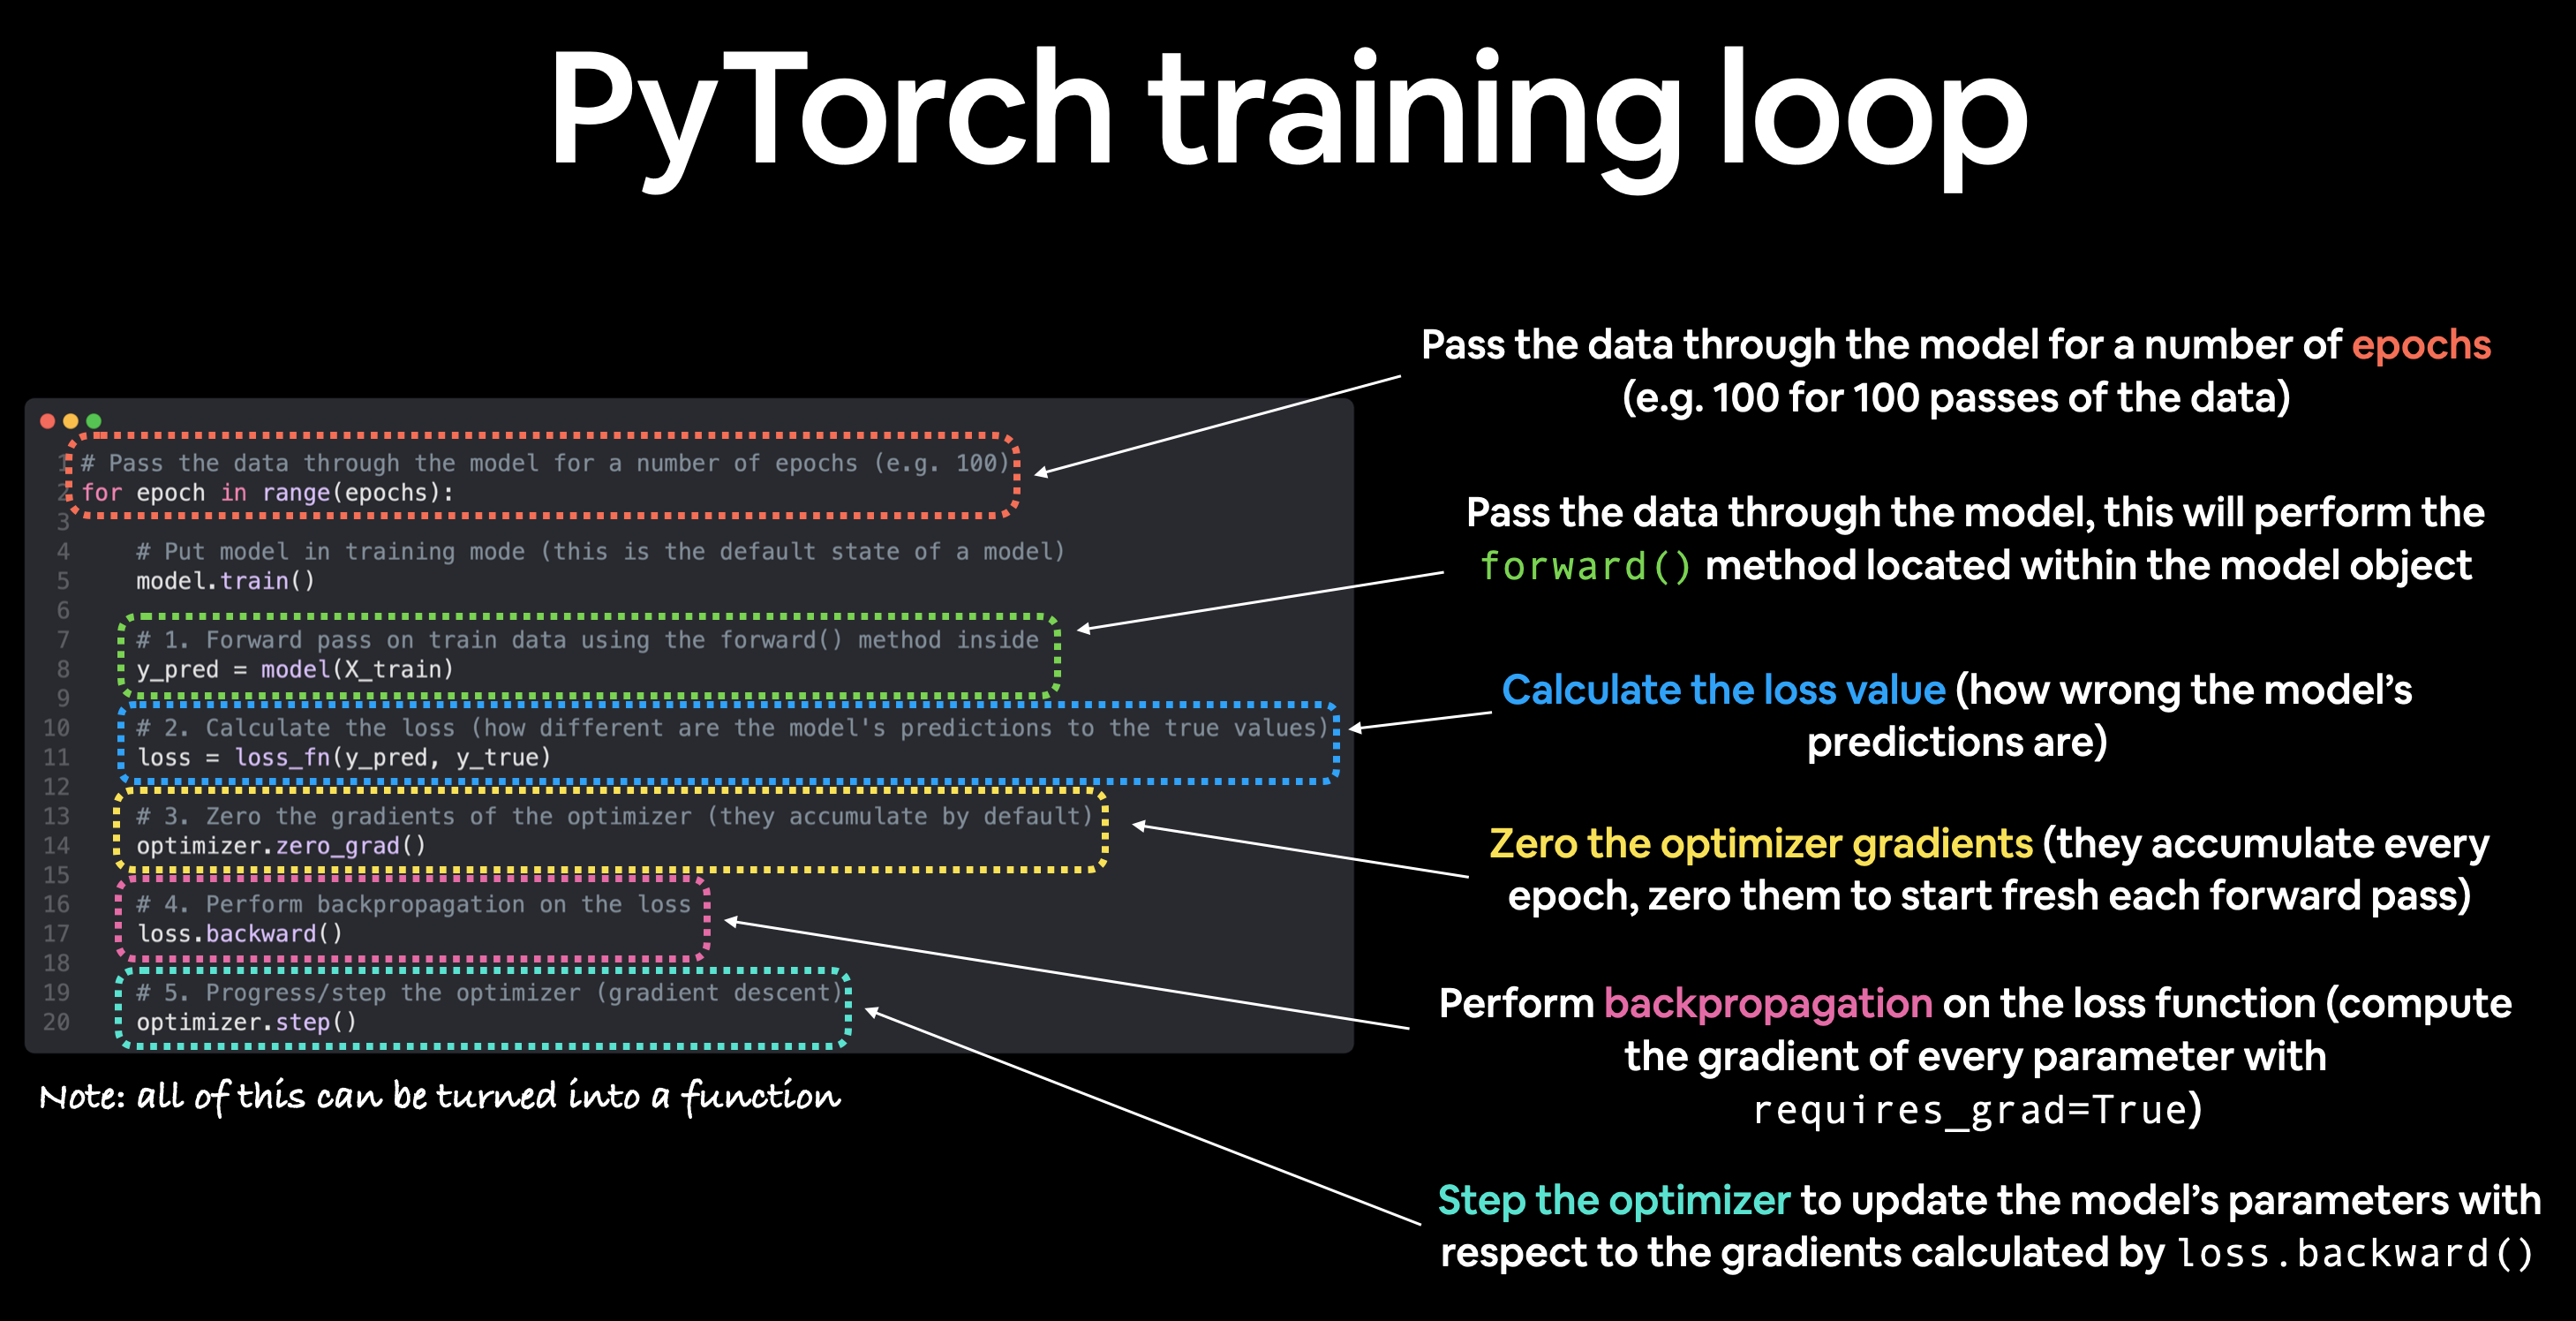

In [28]:
torch.manual_seed(42) ## set manual seed for reproducibility


## An epoch is 1 loop through the data...(this is a hyperparameter because we set it ourselves)
## 1 pass through the data
epochs = 200

## experiment tracking -- track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training loop
# 0. loop through the data
for epoch in range(epochs):
  # set model to training model
  # train mode in pytorch --> sets all parameters that require gradients to require gradients!
  model_0.train()

  # 1. Forward pass --> pass X_train to the model
  y_pred = model_0(X_train)

  # 2. Calculate the loss (MAE or L1 loss) --> diff between y_pred and y_train
  ## how close are preds to actual?
  loss = loss_fn(y_pred, y_train) ## loss on y_train
  #print(f"Loss: {loss}")

  ## note: there can be some different iterations of these steps depending
  ## on your data and model
  # 3. optimizer zero grad --> zero out the gradients after forward pass
  optimizer.zero_grad()

  # 4. Backward prop on loss with respect to parameters of model
  loss.backward()

  # 5. Step the optimizer --> gradient descent!
  ## by default --> how the optimizer changes will accumulate through loop
  ## so we have to zero them above before next pass through loop
  optimizer.step()


  ## Testing/evaluating model
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout, batchnorm, gradient clipping, etc.)
  with torch.inference_mode(): # turns off gradient tracking & a few more things behind the scenes -- similar to torch.no_grad() in older pytorch code
    ## 1. Forward pass
    test_pred = model_0(X_test) ## predict on test set

    ## 2. Calculate the loss (test_loss on test dataset)
    test_loss = loss_fn(test_pred, y_test) ## y_test

    ## 3. print out whats happening --> epoch | loss | test_loss
  if epoch % 10 == 0:
    ## append each value to track
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    # Print out model state dict
    print(f"Model state dict: {model_0.state_dict()}")

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Model state dict: OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Model state dict: OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Model state dict: OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Model state dict: OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Model state dict: OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Model state dict: OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.0381893292

## Plot loss curves

In [29]:
import numpy as np

### convert loss values of training loss to numpy
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

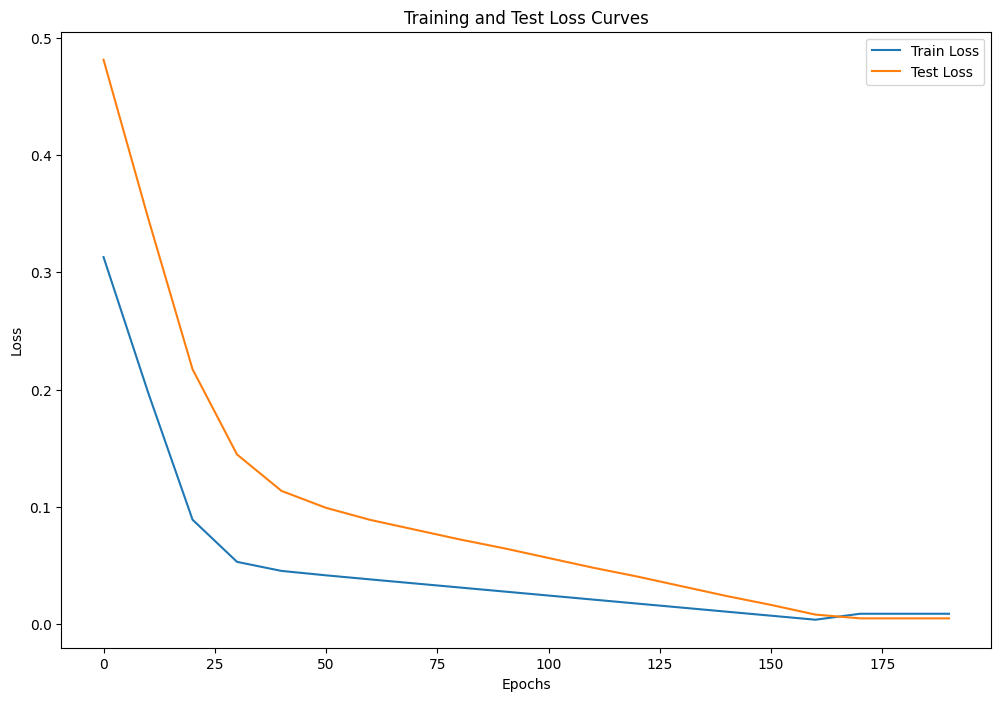

In [30]:
## plot loss curves for train and test
## also convert loss values of training loss to numpy
plt.figure(figsize=(12,8))
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show();

In [31]:
## make predictions
with torch.inference_mode():
  y_preds_new = model_0(X_test)

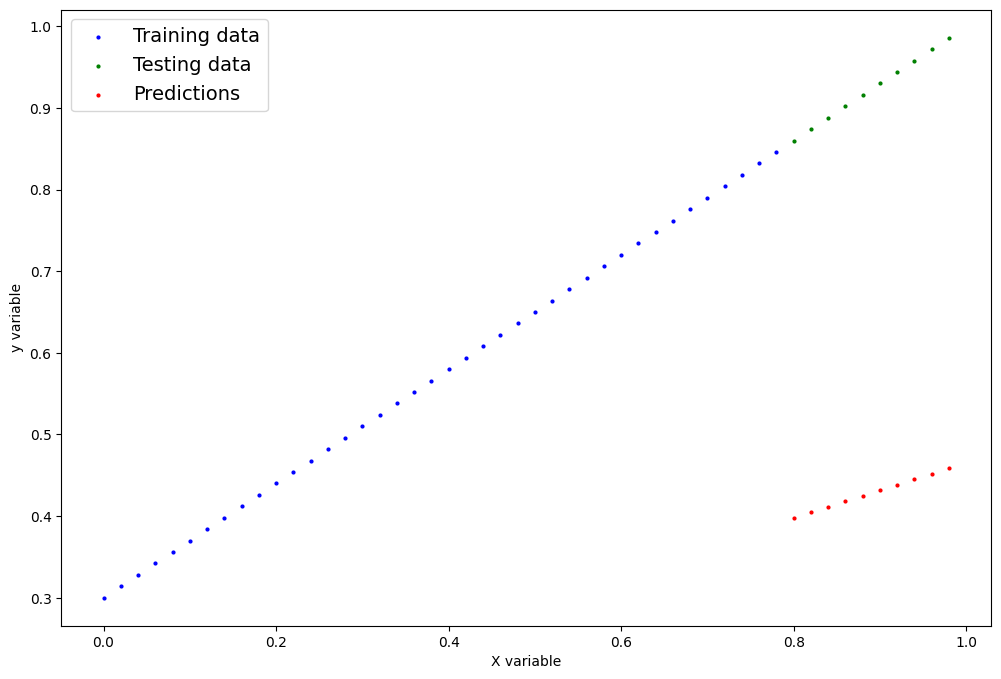

In [32]:
plot_preds(predictions=y_preds)

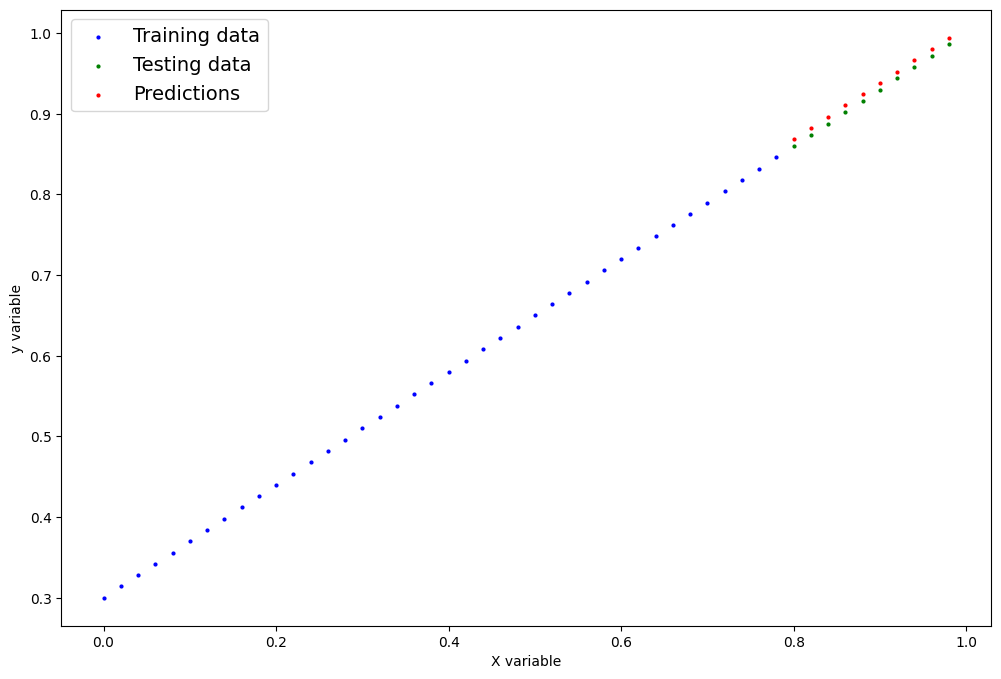

In [33]:
plot_preds(predictions=y_preds_new)

Summary
* We can see that the loss getting lower is getting our predictions are closer to the actual.

# Saving a model in PyTorch
* There are 3 main methods to save and load a model in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format.
  * https://docs.python.org/3/library/pickle.html

2. `torch.load()` - allows you to load a saved PyTorch object.
  * Allows you to unpickle a file.
  * docs: https://pytorch.org/docs/stable/generated/torch.load.html

3. `torch.nn.Module.load_state_dict()` - this allows you to load a model's saved state dictionary.
  * docs: https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [34]:
## state dict --> model params stored in python dictionary
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [35]:
# Saving our PyTorch model
from pathlib import Path

# 1. create models directory
MODEL_PATH = Path("models") #save to "models" file
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path  --> give it a name --> `.pth` or `.pt`
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [36]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Feb 21 14:55 01_pytorch_workflow_model_0.pth


# Loading a PyTorch model
* Since we saved our model's `state_dict()` rather than the entire model, we will create a new instance of our model class and load the `state_dict(_)` that was saved into that.

In [37]:
## model state dict
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [38]:
## to load in saved state_dict we have to init
## new instance of model class
loaded_model_0 = LinearRegressionModel() # same class as above


# Load saved state_dict of model_0 (this will update the new instance with updated params)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-38-50c282663aeb>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [39]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [40]:
## Make predictions with our loaded model to test it
loaded_model_0.eval() ## eval mode
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test) #forward pass on X_test


loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [41]:
# compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [42]:
## make model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)


In [43]:
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [44]:
## compare
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting it all together
* Now lets put all the steps above together



## 1. Import dependencies

In [45]:
## 1. imports
import torch
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline

# check torch version
print(f"PyTorch version: {torch.__version__}")

PyTorch version: 2.5.1+cu124


## 2. Device Agnostic code
* if GPU is available model will use it, if not then CPU.

In [46]:
## 2. Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Current Device: {device}")

Current Device: cuda


## 3. Data
* using linear regression equation:
  * `y = ax + b`
  * a = weight
  * x = intercept
  * b = bias

In [47]:
## Create some data using linear regression formula: y = weight * X + bias
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

# create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze dim error
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [48]:
## split data
train_split = int(0.8 * len(X)) # 80% of data for training
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# length of data
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

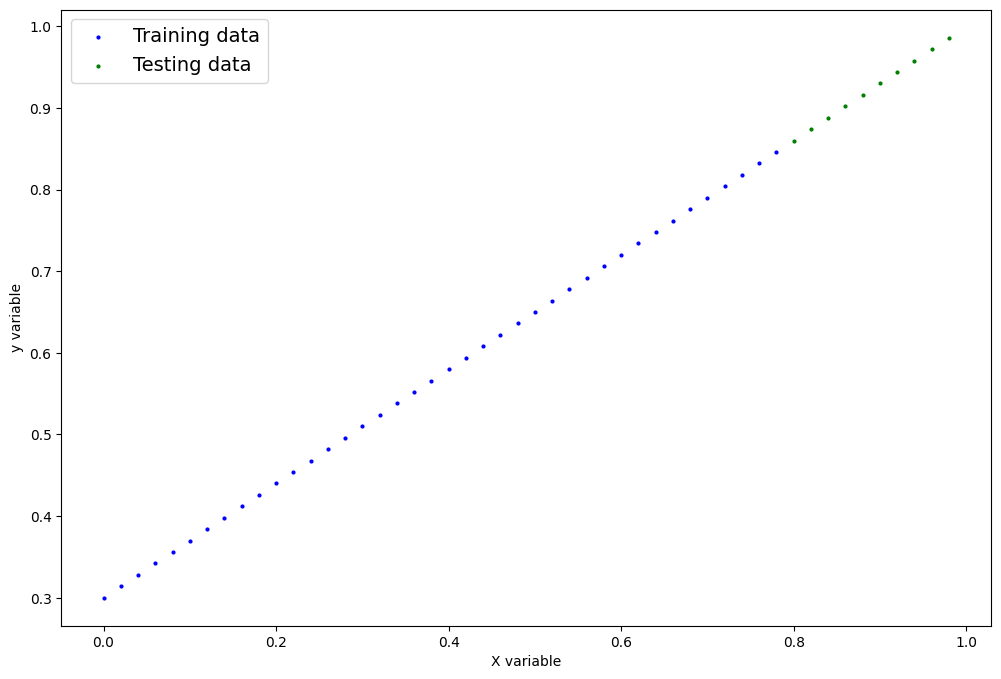

In [49]:
## plot data
## note if you dont have plot_preds function above this wont work
plot_preds(X_train, y_train, X_test, y_test)

## 4. Building PyTorch Linear Model
* docs: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
* Same equation as linear regression:
```
y= ax + b
```

In [50]:
## create a linear model by subclassing nn.Module
class LinearRegressionV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear() for creating model parameters
    # also called linear transform, probing layer, fully-connected layer, dense layer in TF
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  # forward pass --> using X
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# set manual seed for reproducibility
torch.manual_seed(42)
## init instance of model
model_1 = LinearRegressionV2()

# print model, state_dict()
model_1, model_1.state_dict()

(LinearRegressionV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [51]:
## Set model for device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [52]:
## current device
next(model_1.parameters()).device

device(type='cpu')

In [53]:
## set the model to use target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

## 5. Training Model

For training we need:
* Loss function
  * measures how close our predictions are to actual
* Optimizer
  * optimize model params
  * lr --> steps for gradient descent
* Training Loop
* Testing Loop

In [54]:
## 1. Loss Function setup
loss_fn = nn.L1Loss() # same as MAE

## 2. Optimizer setup -- params + lr
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01, )

In [55]:
# 3. Training loop

## set seed
torch.manual_seed(42)

## set epochs
epochs = 200

## Put data on target device - device agnostic code
## always do this!!!
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

## train loop
for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer zero_grad
  optimizer.zero_grad()

  # 4. loss backward (backpropagation)
  ## update weights & biases
  loss.backward()

  # 5. optimizer step -- optimize outputs
  optimizer.step()

## 4. Test loop
  ## test loop
  ## 1. set model to eval model
  model_1.eval()
  ## 2. inference mode
  with torch.inference_mode():  ## turn off gradients
    ## 3. forward pass
    test_pred = model_1(X_test)
    ## 4. calculate loss
    test_loss = loss_fn(test_pred, y_test)

  # 5. Print out whats happenin! --> epoch | loss | test_loss
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416

In [56]:
## evaluate model
## 1. state dict
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

Summary
* We can see the model predicted the weight at 0.6968 which is very close to the original which was 0.7.
* The bias prediction is 0.3025 which is basically the same as the original bias of 0.3!

In [57]:
## weight and bias
weight, bias

(0.7, 0.3)

## 6. Making and Evaluating Predictions

In [64]:
## turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

## view y_preds
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

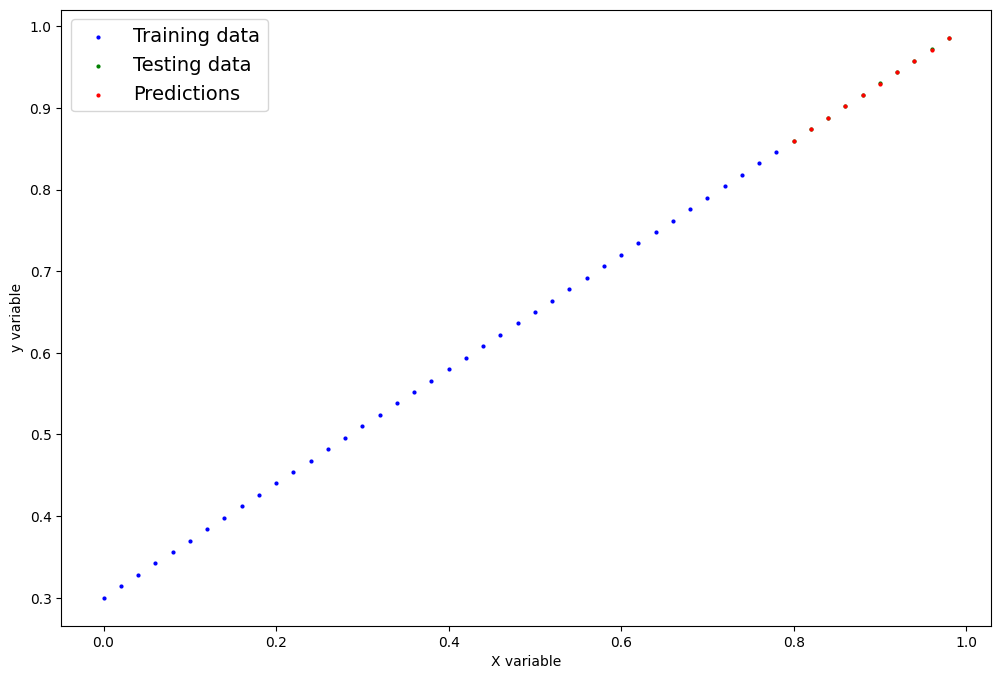

In [66]:
# check out model predictions visually -- visualize, visualize, visualize!
plot_preds(predictions=y_preds.cpu())

## 7. Saving and Loading the model

In [69]:
from pathlib import Path ## need path to save model to

## 1. create models directory -- if doesnt already exist
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

## 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#MODEL_SAVE_PATH

## 3. SAVE MODEL STATE DICT
print(f"Saving PyTorch model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving PyTorch model to: models/01_pytorch_workflow_model_1.pth


In [70]:
## check state_dict()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [71]:
## 4. Load saved torch model

## create new instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionV2()


## load saved model_1 state_dict()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


## put loaded model to device
loaded_model_1.to(device)

<ipython-input-71-be2cfd7c2f6d>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


LinearRegressionV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [72]:
## parameters
next(loaded_model_1.parameters()).to(device)

Parameter containing:
tensor([[0.6968]], device='cuda:0', requires_grad=True)

In [73]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [74]:
## evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

Summary
* They are the same! Our model is able to predict with accuracy.